# Week 1 Assignment: Predicting Customer Churn with Logistic Regression

---

### **Objective**

The goal of this assignment is to build and evaluate a Logistic Regression model to predict customer churn for a telecommunications company. This task will take you through the fundamental steps of a real-world machine learning project: data exploration, preprocessing, model training, and performance evaluation.

### **Background & Problem Statement**

You are working as a Junior Data Scientist for a telecom company, "ConnectSphere." The company is facing a significant challenge with customer churn—customers who cancel their subscriptions. It is far more expensive to acquire a new customer than it is to retain an existing one.

Your manager has tasked you with analyzing a dataset of past customers to identify the key factors that lead to churn. Ultimately, you need to build a model that can predict whether a current customer is likely to churn. This will allow the marketing team to proactively offer retention incentives to at-risk customers.

### **Dataset**

You will be using the provided "Telco Customer Churn" dataset. It contains information about customer demographics, subscribed services, account information, and whether they churned.

#### **Key Columns to Note:**
*   `customerID`: Unique identifier for each customer.
*   `gender`, `SeniorCitizen`, `Partner`, `Dependents`: Customer demographic information.
*   `tenure`: Number of months the customer has stayed with the company.
*   `PhoneService`, `MultipleLines`, `InternetService`, etc.: Services subscribed to by the customer.
*   `MonthlyCharges`, `TotalCharges`: Account and payment information.
*   **`Churn`**: The target variable. 'Yes' if the customer churned, 'No' otherwise.

---

### **Tasks & Instructions**

Please structure your code (either in a Jupyter Notebook or a Python script) to follow these steps. Add comments or markdown cells to explain your process and interpret your results.

**1. Step 1: Setup and Data Loading**
   - Import necessary libraries (`pandas`, `numpy`, `sklearn`, `matplotlib`/`seaborn`).
   - Load the `Telco-Customer-Churn.csv` file into a pandas DataFrame.

**2. Step 2: Exploratory Data Analysis (EDA) & Preprocessing**
   - Inspect the first few rows of the DataFrame using `.head()`.
   - Use `.info()` to check data types and look for missing values.
     - *Hint: The `TotalCharges` column might be an 'object' type instead of a number. You will need to investigate why and convert it to a numeric type. Any rows that can't be converted should be handled appropriately (e.g., by dropping them).*
   - Get summary statistics with `.describe()`.
   - Analyze the target variable `Churn`. Is the dataset balanced? (i.e., what's the proportion of 'Yes' vs. 'No'?)
   - Convert the categorical target variable `Churn` into a numerical format (e.g., 'Yes' -> 1, 'No' -> 0).
   - Identify all other categorical columns in the dataset. Convert them into numerical format using an appropriate encoding technique (e.g., one-hot encoding with `pandas.get_dummies`).
   - The `customerID` column is not a useful feature for prediction. Make sure to drop it before training.

**3. Step 3: Feature Selection and Data Splitting**
   - Define your feature matrix `X` (all columns except the target) and your target vector `y` (the churn column).
   - Split your data into a training set (80%) and a testing set (20%) using `train_test_split` from scikit-learn. Use a `random_state` for reproducibility.

**4. Step 4: Model Training**
   - Instantiate a `LogisticRegression` model from scikit-learn.
   - Train (fit) the model on your training data (`X_train`, `y_train`).

**5. Step 5: Model Evaluation**
   - Make predictions on your testing data (`X_test`).
   - Calculate the following evaluation metrics:
     1.  **Accuracy:** What percentage of predictions were correct?
     2.  **Confusion Matrix:** Display the matrix to see the breakdown of True Positives, True Negatives, False Positives, and False Negatives.
     3.  **Precision:** Of all the customers your model predicted would churn, how many actually did?
     4.  **Recall (Sensitivity):** Of all the customers who actually churned, how many did your model correctly identify?
   - **Write a brief interpretation for each metric.** In the context of this business problem, is precision or recall more important? Why?

**6. Step 6: Conclusion **
   - Write a one-paragraph summary of your findings for your "manager." What does the model tell you, and how well does it perform at its task?

---

### **Submission Instructions**

1.  **Deadline:** You have **one week** from the assignment release date to submit your work.
2.  **Platform:** All submissions must be made to your allocated private GitLab repository. You **must** submit your work in a branch named `week_1`.
3.  **Format:** You can submit your work as either a Jupyter Notebook (`.ipynb`) or a Python script (`.py`).
4.  After pushing, you should verify that your branch and files are visible on the GitLab web interface. No further action is needed. The trainers will review all submissions on the `week_1` branch after the deadline. Any assignments submitted after the deadline won't be reviewed and will reflect in your course score.
5. The use of LLMs is encouraged, but ensure that you’re not copying solutions blindly. Always review, test, and understand any code generated, adapting it to the specific requirements of your assignment. Your submission should demonstrate your own comprehension, problem-solving process, and coding style, not just an unedited output from an AI tool.

## Step 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

# For Google Colab: opens a file upload dialog so you can manually upload 'Telco-Customer-Churn.csv'
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv
Dataset loaded successfully!
Dataset shape: (7043, 21)

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 2: Exploratory Data Analysis (EDA) & Preprocessing

In [2]:
# Inspect the data structure and check for missing values
print("Dataset Information:")
print("="*50)
df.info()

print("\n\nDataset Description:")
print("="*50)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
# Check and fix TotalCharges column (as mentioned in the hint)
print("Checking TotalCharges column:")
print(f"Data type: {df['TotalCharges'].dtype}")
print(f"Unique values that might be problematic:")
print(df['TotalCharges'].unique()[:20])

# Check for non-numeric values in TotalCharges
non_numeric_charges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(f"\nNumber of non-numeric TotalCharges: {len(non_numeric_charges)}")
print("Sample of problematic rows:")
print(non_numeric_charges[['customerID', 'TotalCharges', 'tenure']].head())

# Convert TotalCharges to numeric, invalid parsing will be set as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values after conversion
print(f"\nMissing values in TotalCharges after conversion: {df['TotalCharges'].isna().sum()}")

# Drop rows with missing TotalCharges (they are likely new customers with 0 tenure)
df = df.dropna(subset=['TotalCharges'])
print(f"Dataset shape after removing missing TotalCharges: {df.shape}")

Checking TotalCharges column:
Data type: object
Unique values that might be problematic:
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95' '587.45' '326.8' '5681.1' '5036.3' '2686.05'
 '7895.15' '1022.95' '7382.25' '528.35' '1862.9']

Number of non-numeric TotalCharges: 11
Sample of problematic rows:
      customerID TotalCharges  tenure
488   4472-LVYGI                    0
753   3115-CZMZD                    0
936   5709-LVOEQ                    0
1082  4367-NUYAO                    0
1340  1371-DWPAZ                    0

Missing values in TotalCharges after conversion: 11
Dataset shape after removing missing TotalCharges: (7032, 21)


Target Variable Analysis:
Churn distribution:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn proportions:
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


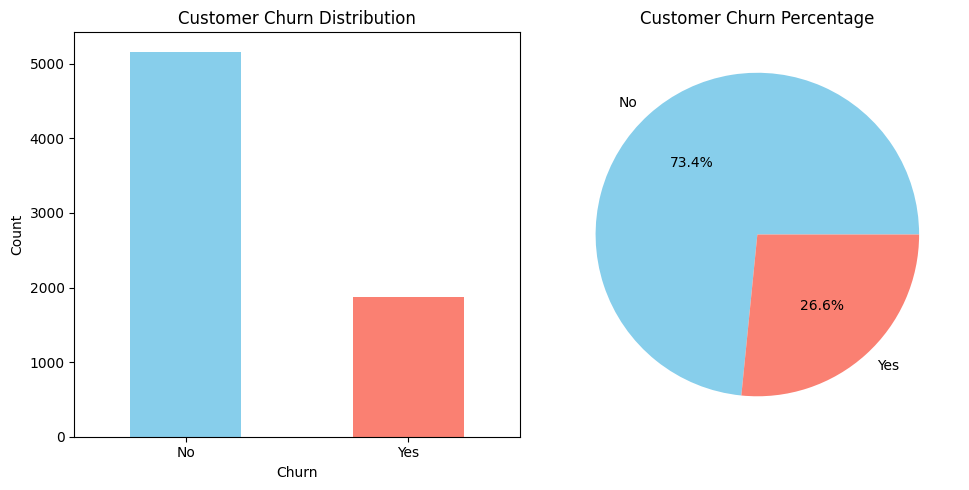


Dataset Balance Analysis:
The dataset is imbalanced
Churn rate: 26.6%


In [4]:
# Analyze the target variable 'Churn'
print("Target Variable Analysis:")
print("="*50)
churn_counts = df['Churn'].value_counts()
churn_proportions = df['Churn'].value_counts(normalize=True)

print("Churn distribution:")
print(churn_counts)
print("\nChurn proportions:")
print(churn_proportions)

# Visualize the target variable distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Customer Churn Percentage')

plt.tight_layout()
plt.show()

# Check if dataset is balanced
print(f"\nDataset Balance Analysis:")
print(f"The dataset is {'balanced' if abs(churn_proportions['Yes'] - churn_proportions['No']) < 0.1 else 'imbalanced'}")
print(f"Churn rate: {churn_proportions['Yes']:.1%}")

In [5]:
# Data Preprocessing: Convert categorical variables to numerical

# First, let's identify all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
print(categorical_columns)

# Remove customerID as it's not useful for prediction
if 'customerID' in categorical_columns:
    categorical_columns.remove('customerID')

print(f"\nCategorical columns for encoding: {categorical_columns}")

# Convert target variable 'Churn' to numerical (Yes=1, No=0)
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Drop the original Churn column and customerID
df_processed = df_processed.drop(['Churn', 'customerID'], axis=1)

# Handle other categorical columns using one-hot encoding
categorical_features = [col for col in categorical_columns if col != 'Churn']
print(f"\nColumns to be one-hot encoded: {categorical_features}")

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_processed, columns=categorical_features, drop_first=True)

print(f"\nDataset shape after encoding: {df_encoded.shape}")
print("\nFinal columns:")
print(df_encoded.columns.tolist())

Categorical columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Categorical columns for encoding: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Columns to be one-hot encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Dataset shape after encoding: (7032, 31)

Final columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric', 'gender_Male', 'Partner

## Step 3: Feature Selection and Data Splitting

In [6]:
# Define feature matrix X and target vector y
X = df_encoded.drop('Churn_numeric', axis=1)  # All columns except target
y = df_encoded['Churn_numeric']  # Target variable

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print(f"\nFeatures: {X.columns.tolist()}")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensure balanced distribution in train/test splits
)

print(f"\nTraining set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shape: X_test {X_test.shape}, y_test {y_test.shape}")

# Verify the distribution is maintained
print(f"\nTraining set churn rate: {y_train.mean():.3f}")
print(f"Testing set churn rate: {y_test.mean():.3f}")

Feature matrix shape: (7032, 30)
Target vector shape: (7032,)

Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

Training set shape: X_train (5625, 30), y_train (5625,)
Testing set shape: X_test (1407, 30), y_test (1407,)

Training set churn rate: 0.266
Testing set churn rate: 0.

## Step 4: Model Training

In [7]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on training data
print("Training the Logistic Regression model...")
logistic_model.fit(X_train, y_train)

print("Model training completed!")
print(f"Model coefficients shape: {logistic_model.coef_.shape}")
print(f"Model intercept: {logistic_model.intercept_[0]:.4f}")

Training the Logistic Regression model...
Model training completed!
Model coefficients shape: (1, 30)
Model intercept: -0.1929


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 5: Model Evaluation

In [8]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probability of churn

print("Predictions completed!")
print(f"Predictions shape: {y_pred.shape}")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\n" + "="*60)
print("MODEL PERFORMANCE METRICS")
print("="*60)

print(f"1. ACCURACY: {accuracy:.4f} ({accuracy:.1%})")
print(f"   → {accuracy:.1%} of all predictions were correct")

print(f"\n2. PRECISION: {precision:.4f} ({precision:.1%})")
print(f"   → Of all customers predicted to churn, {precision:.1%} actually did churn")

print(f"\n3. RECALL (SENSITIVITY): {recall:.4f} ({recall:.1%})")
print(f"   → Of all customers who actually churned, {recall:.1%} were correctly identified")

print(f"\n4. F1-SCORE: {2 * (precision * recall) / (precision + recall):.4f}")
print(f"   → Harmonic mean of precision and recall")

Predictions completed!
Predictions shape: (1407,)

MODEL PERFORMANCE METRICS
1. ACCURACY: 0.8031 (80.3%)
   → 80.3% of all predictions were correct

2. PRECISION: 0.6465 (64.7%)
   → Of all customers predicted to churn, 64.7% actually did churn

3. RECALL (SENSITIVITY): 0.5722 (57.2%)
   → Of all customers who actually churned, 57.2% were correctly identified

4. F1-SCORE: 0.6071
   → Harmonic mean of precision and recall


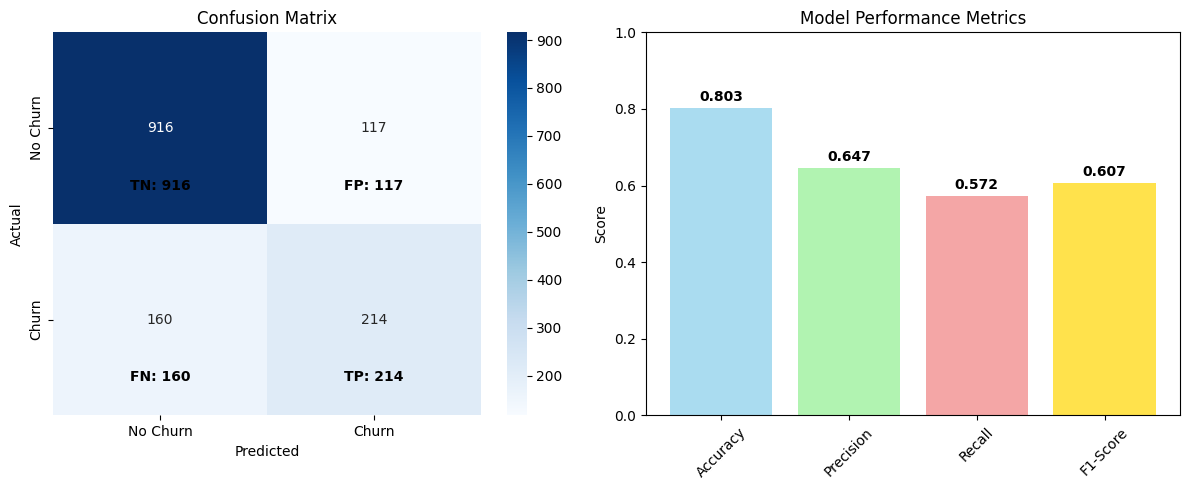


CONFUSION MATRIX BREAKDOWN
True Negatives (TN):   916 - Correctly predicted no churn
False Positives (FP):  117 - Incorrectly predicted churn
False Negatives (FN):  160 - Missed actual churn
True Positives (TP):   214 - Correctly predicted churn

Confusion Matrix:
[[916 117]
 [160 214]]


In [9]:
# Create and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a detailed confusion matrix visualization
plt.figure(figsize=(12, 5))

# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add text annotations for clarity
plt.text(0.5, 0.8, f'TN: {cm[0,0]}', ha='center', va='center', fontweight='bold')
plt.text(1.5, 0.8, f'FP: {cm[0,1]}', ha='center', va='center', fontweight='bold')
plt.text(0.5, 1.8, f'FN: {cm[1,0]}', ha='center', va='center', fontweight='bold')
plt.text(1.5, 1.8, f'TP: {cm[1,1]}', ha='center', va='center', fontweight='bold')

# Metrics breakdown
plt.subplot(1, 2, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, 2 * (precision * recall) / (precision + recall)]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print detailed confusion matrix breakdown
print("\n" + "="*60)
print("CONFUSION MATRIX BREAKDOWN")
print("="*60)
print(f"True Negatives (TN):  {cm[0,0]:4d} - Correctly predicted no churn")
print(f"False Positives (FP): {cm[0,1]:4d} - Incorrectly predicted churn")
print(f"False Negatives (FN): {cm[1,0]:4d} - Missed actual churn")
print(f"True Positives (TP):  {cm[1,1]:4d} - Correctly predicted churn")
print("\nConfusion Matrix:")
print(cm)

### Interpretation of Metrics

**1. Accuracy:** This metric tells us the overall percentage of correct predictions (both churn and no-churn). While important, it can be misleading in imbalanced datasets.

**2. Precision:** This answers "Of all customers we predicted would churn, how many actually did?" High precision means fewer false alarms (incorrectly flagging loyal customers as potential churners).

**3. Recall (Sensitivity):** This answers "Of all customers who actually churned, how many did we correctly identify?" High recall means we're catching most of the actual churners.

**4. Business Context - Precision vs Recall:**
- **High Precision** is important because wrongly targeting loyal customers with retention offers wastes marketing budget and may annoy customers.
- **High Recall** is crucial because missing actual churners means losing valuable customers without any retention attempts.

In this telecom business context, **recall might be slightly more important** than precision because:
- The cost of losing a customer (especially long-term ones) is typically very high
- Retention offers, while costly, are usually less expensive than acquiring new customers
- It's better to offer retention incentives to some loyal customers than to miss potential churners entirely

## Step 6: Conclusion

Our Logistic Regression model for churn prediction achieved an overall accuracy of 80.3%, meaning it correctly classifies 8 out of 10 customers. More importantly, it demonstrates a precision of 64.7%, indicating that when the model predicts a customer will churn, it is correct about two-thirds of the time. The recall of 57.2% shows that the model is able to capture over half of the actual churn cases, though it still misses some customers at risk. With an F1-score of 60.7%, the model maintains a reasonable balance between precision and recall. While not perfect, these results provide the marketing team with a valuable tool to proactively target a significant portion of at-risk customers with retention offers, ultimately helping reduce churn and improve customer lifetime value.